Text(0, 0.5, 'y')

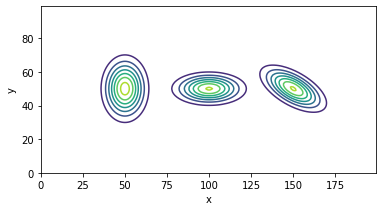

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import multivariate_normal
%matplotlib inline

x, y = np.mgrid[0:200, 0:100]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

a = multivariate_normal(mean=[50, 50], cov=[[50, 0], [0, 100]])
b = multivariate_normal(mean=[100, 50], cov=[[125, 0], [0, 25]])
c = multivariate_normal(mean=[150, 50], cov=[[100, -25 * math.sqrt(3)], [-25 * math.sqrt(3), 50]])

plt.contour(x, y, a.pdf(pos))
plt.contour(x, y, b.pdf(pos))
plt.contour(x, y, c.pdf(pos))

plt.gca().set_aspect('equal')
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

In [5]:
eig_vals, eig_vec = np.linalg.eig(c.cov)
print('eig_vals', eig_vals)
print('eig_vec', eig_vec)
print('eig1', eig_vec[:, 0])
print('eig2', eig_vec[:, 1])

eig_vals [125.  25.]
eig_vec [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
eig1 [ 0.8660254 -0.5      ]
eig2 [0.5       0.8660254]


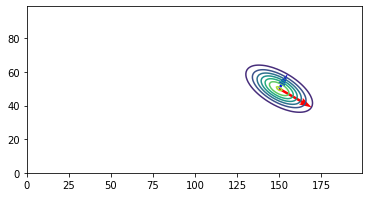

In [6]:
plt.contour(x, y, c.pdf(pos))

v = 2 * math.sqrt(eig_vals[0]) * eig_vec[:, 0]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color='red', angles='xy', scale_units='xy', scale=1)

v = 2 * math.sqrt(eig_vals[1]) * eig_vec[:, 1]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color='blue', angles='xy', scale_units='xy', scale=1)

plt.gca().set_aspect('equal')